In [4]:
import seaborn as sns
sns.set()

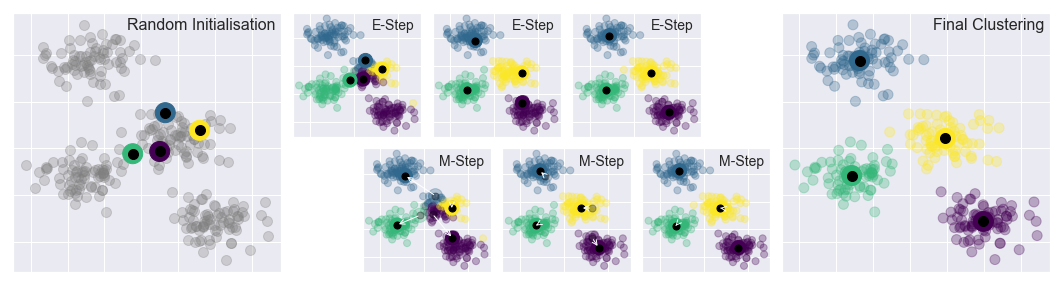

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialisation", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.savefig('expectation-maximization.png', dpi = 600)

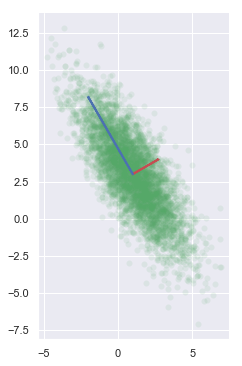

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

#rcParams['font.family'] = 'serif'
#rcParams['font.size'] = 16


ang = np.pi/6
mean = np.array([1, 3])
cov = np.array([[1, 0],
                [0, 9]])
rot = np.array([[np.cos(ang), -np.sin(ang)],
                [np.sin(ang), np.cos(ang)]])
cov = np.dot(rot, np.dot(cov, rot.T))

np.random.seed(seed=1)
data = np.random.multivariate_normal(mean, cov, size=(5000))
x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c="g", alpha=0.1, lw=0)
plt.arrow(1, 3, 2*np.cos(ang), 2*np.sin(ang), color="r", lw= 2, shape = "right")
plt.arrow(1, 3, -6*np.sin(ang), 6*np.cos(ang), color="b", lw=2)
plt.grid(True)
plt.axis("image")
sns.despine()
#plt.axis([-8, 10, -6, 12])
plt.savefig("GaussianScatterPCA.png", dpi = 600)
#plt.show()

/Users/raphael/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice.
/Users/raphael/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

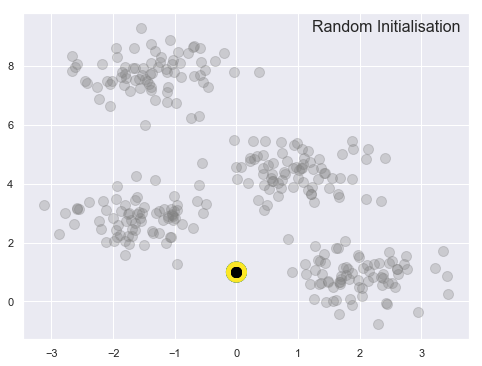

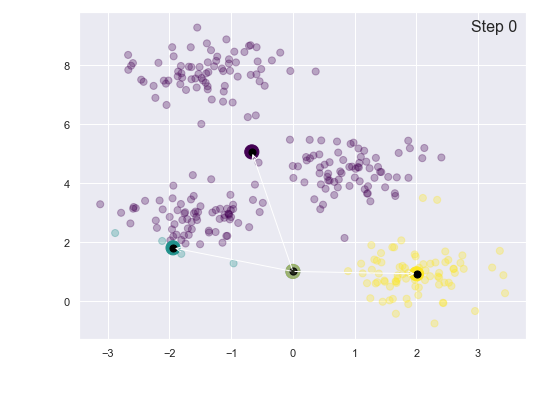

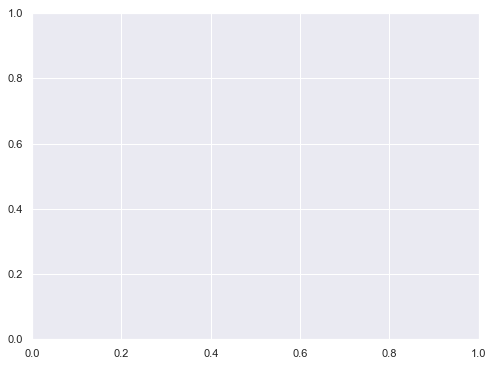

In [71]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

nsteps = 10
nclusters = 4
filename = 'PCAprocedureBadInit'

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)

rng = np.random.RandomState(42)
#centers = [0, 4] + 2*rng.randn(4, 2)
centers = [0,1] + 0.0002*rng.randn(4,2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(8, 6))
#gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax = plt.gca()
ax.text(0.98, 0.98, "Random Initialisation", transform=ax.transAxes, ha='right', va='top',size=16)
draw_points(ax, 'gray', factor=2)
draw_centers(ax, centers, factor=2)
fig.savefig(filename+'0.png', dpi = 600)

#plt.clf()

for i in range(nsteps):
    fig = plt.figure(figsize=(8, 6))

    ax = plt.gca()
    y_pred = pairwise_distances_argmin(X, centers)
    new_centers = np.array([X[y_pred == k].mean(0) for k in range(nclusters)])
    draw_points(ax, y_pred)
    draw_centers(ax, centers, alpha=0.3)
    draw_centers(ax, new_centers)
    for j in range(nclusters):
        ax.annotate('', new_centers[j], centers[j],
                     arrowprops=dict(arrowstyle='->', linewidth=1))   
    # Finish iteration
    centers = new_centers
    ax.text(0.98, 0.98, "Step "+str(i), transform=ax.transAxes, ha='right', va='top', size=16)
    fig.savefig(filename+str(i+1)+'.png', dpi = 600)

# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
#axf = make_ax(fig, gs[:4, -4:])
draw_points(ax, y_pred, factor=2)
draw_centers(ax, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=ax.transAxes, ha='right', va='top', size=16)

fig.savefig(filename+str(nsteps+1)+'.png', dpi = 600)

